In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import time


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")



In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


remove id and unamed32 cause they are irrelevant for diagnosis

In [5]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### remove id
dataset = dataset.drop(["id"], axis = 1)
#remove unnamed 32
dataset = dataset.drop(["Unnamed: 32"], axis = 1)


In [6]:
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]

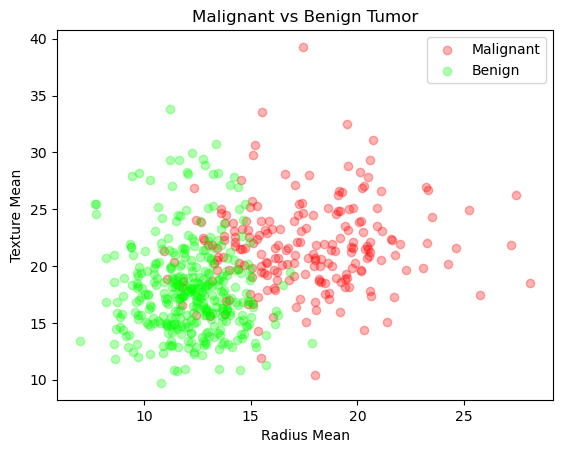

In [7]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

#0 if M else 1 if B
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]
#remove the column that has diagnosis
x = dataset.drop(["diagnosis"], axis = 1)
#give then 0 and 1 values instead
y = dataset.diagnosis.values
#normalization of attributes
x = (x - np.min(x)) / (np.max(x) - np.min(x))

Bayesian Naive


In [8]:
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1)

# Convert 'diagnosis' column to binary values
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

# Split data into features and target
x = dataset.drop(['diagnosis'], axis=1)
y = dataset['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


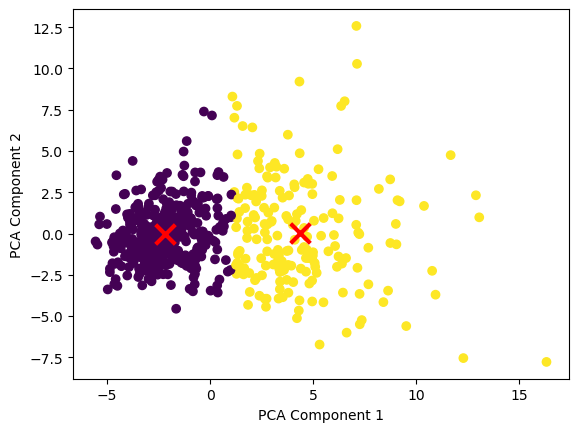

Adjusted Rand Index: 0.659
Homogeneity Score: 0.531
Silhouette Score: 0.345


In [9]:
#KMEANS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=42)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

ari = adjusted_rand_score(y, cluster_labels)
print("Adjusted Rand Index: {:.3f}".format(ari))

homogeneity = homogeneity_score(y, cluster_labels)
print("Homogeneity Score: {:.3f}".format(homogeneity))

silhouette = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score: {:.3f}".format(silhouette))

In [10]:
#KNN WITH RANDOM SPLIT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier and fit it to the training data
start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
knn_error = 1 - knn.score(X_test, y_test)
knn_time = end - start
knn_score = knn.score(X_test, y_test)
print("KNN classification report (with random split):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {knn_score:.3f}, Error: {knn_error:.3f}, Time: {knn_time:.3f}s")

KNN classification report (with random split):

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Score: 0.956, Error: 0.044, Time: 0.019s


In [11]:
#DECISON TREE WITH RANDOM SPLIT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Create a decision tree classifier
start = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
end = time.time()
dtc_error = 1 - dtc.score(X_test, y_test)
dtc_time = end - start
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree classification report (with random split):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {dtc_score:.3f}, Error: {dtc_error:.3f}, Time: {dtc_time:.3f}s")



Decision Tree classification report (with random split):

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Score: 0.930, Error: 0.070, Time: 0.023s


In [12]:
#NAIVE BAYES WITH RANDOM SPLIT
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


start = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
end = time.time()
gnb_error = 1 - gnb.score(X_test, y_test)
gnb_time = end - start
gnb_score = gnb.score(X_test, y_test)
print("Gaussian Naive Bayes classification report (with random split):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {gnb_score:.3f}, Error: {gnb_error:.3f}, Time: {gnb_time:.3f}s")



Gaussian Naive Bayes classification report (with random split):

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Score: 0.974, Error: 0.026, Time: 0.005s


In [13]:
#DECISON TREE WITH CROSS VALIDATION
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


start = time.time()
dtc = DecisionTreeClassifier()
dtc_scores = cross_val_score(dtc, x, y, cv=10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
end = time.time()
dtc_error = 1 - dtc.score(X_test, y_test)
dtc_time = end - start
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree classification report (with cross-validation):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {np.mean(dtc_scores):.3f}, Error: {dtc_error:.3f}, Time: {dtc_time:.3f}s")


Decision Tree classification report (with cross-validation):

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Score: 0.912, Error: 0.061, Time: 0.147s


In [14]:
#NAIVE BAYES WITH CROSS VALIDATION
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


start = time.time()
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, x, y, cv=10)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
end = time.time()
gnb_error = 1 - gnb.score(X_test, y_test)
gnb_time = end - start
gnb_score = gnb.score(X_test, y_test)
print("Gaussian Naive Bayes classification report (with cross-validation):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {np.mean(gnb_scores):.3f}, Error: {gnb_error:.3f}, Time: {gnb_time:.3f}s")


Gaussian Naive Bayes classification report (with cross-validation):

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Score: 0.937, Error: 0.026, Time: 0.057s


In [15]:
#KNN WITH CROSS VALIDATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

start = time.time()
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, x, y, cv=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
knn_error = 1 - knn.score(X_test, y_test)
knn_time = end - start
knn_score = knn.score(X_test, y_test)
print("KNN classification report (with cross-validation):\n")
print(classification_report(y_test, y_pred))
print(f"Score: {np.mean(knn_scores):.3f}, Error: {knn_error:.3f}, Time: {knn_time:.3f}s")

KNN classification report (with cross-validation):

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Score: 0.930, Error: 0.044, Time: 0.191s


In [16]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[69  2]
 [ 3 40]]
Accuracy: 0.96


In [17]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model
model = SVC()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[71  0]
 [ 2 41]]
Accuracy: 0.98
